# Unsupervised keyword extraction with NLU using the YAKE algorithm

We can use the YAKE algorithm to extract keywords from text data.

Yake is an Unsupervised, Corpus-Independent, Domain and Language-Independent and Single-Document keyword extraction algorithm.

 Yake is a novel feature-based system for multi-lingual keyword extraction, which supports texts of different sizes, domain or languages. Unlike other approaches,  It follows an unsupervised approach which builds upon features extracted from the text, making it thus applicable to documents written in different languages without the need for further knowledge. This can be beneficial for a large number of tasks and a plethora of situations where access to training corpora is either limited or restricted.


# 1. Install Java and NLU

In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null 

# 2. Load the Yake model and predict some sample keywords

In [2]:
import nlu
sarcasm_pipe  = nlu.load('yake')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

,keywords,keywords_score,sentence
origin_index,,,
0,"[gotta, give, halloween]","[0.5309364199638367, 0.6388072967529297, 0.389...",gotta love the teachers who give exams on the ...


3.1 Download sample dataset

In [3]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-09-15 17:19:43--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  53.2MB/s    in 4.6s    

2020-09-15 17:19:48 (53.0 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


## 3.2 Predict on sample dataset
NLU expects a text column, thus we must create it from the column that contains our text data

In [4]:
keyword_pipe  = nlu.load('yake')
df['text'] = df['comment']
keyword_predictions = sarcasm_pipe.predict(df['text'].iloc[0:5000])
keyword_predictions

,keywords,keywords_score,sentence
origin_index,,,
0,"[nc, nh, nc and nh]","[0.45423248410224915, 0.579886257648468, 1.038...",NC and NH.
1,"[west, teams, west, teams, teams, west teams, ...","[0.24868635833263397, 0.18796378374099731, 0.2...",You do know west teams play against west teams...
2,"[vegas, patriots, vegas line]","[0.4686521291732788, 0.6298676133155823, 0.418...","They were underdogs earlier today, but since G..."
3,"[funny, none, york]","[0.6352198719978333, 0.6352198719978333, 0.635...","This meme isn't funny none of the ""new york ni..."
4,"[use, one, tools]","[0.7494153380393982, 0.7494153380393982, 0.749...",I could use one of those tools.
...,...,...,...
4995,"[hard, blash, point]","[0.7494153380393982, 0.579886257648468, 0.7494...",It's really hard to be positive about Blash at...
4996,"[thats, thinking, stalling]","[0.6040937304496765, 0.7494153380393982, 0.354...","Thats what I was thinking, they're just stalling"
4997,"[pretty, mei, sad]","[0.6040937304496765, 0.579886257648468, 0.7494...",Pretty good art but no glasses on the Mei make...


# 3. Checkout the count of each predicted keyword.    
To do that, we need to eplode the keywords column first and then we can use the value_counts function to get the count of each keyword.     

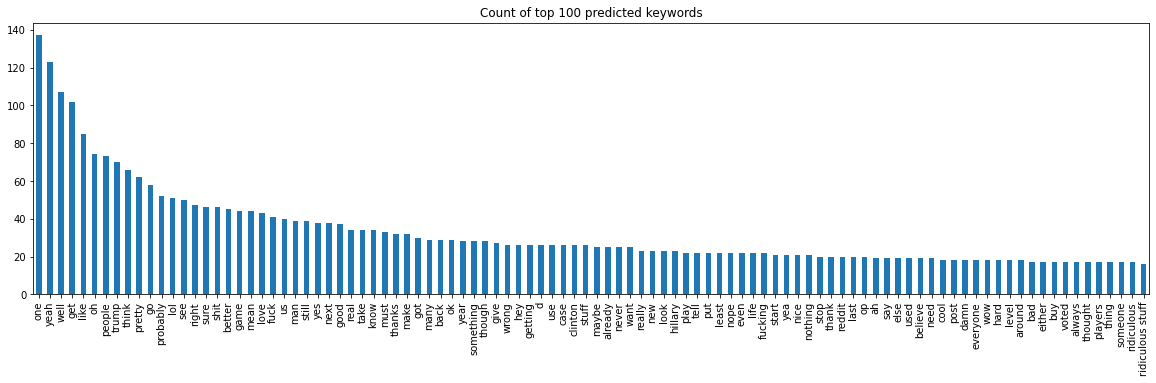

In [5]:
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Count of top 100 predicted keywords', figsize=(20,5))

# 4. Lets configure the model 

You can configure the following parameters for YAKE : 

- setMinNGrams(int) Select the minimum length of a extracted keyword
- setMaxNGrams(int) Select the maximum length of a extracted keyword
- setNKeywords(int) Extract the top N keywords
- setStopWords(list) Set the list of stop words
- setThreshold(float) Each keyword will be given a keyword score greater than 0. (Lower the score better the keyword) Set an upper bound for the keyword score from this method.
- setWindowSize(int) Yake will construct a co-occurence matrix. You can set the - window size for the cooccurence matrix construction from this method. ex: - windowSize=2 will look at two words to both left and right of a candidate word.

In [6]:
keyword_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['yake'] has settable params:
pipe['yake'].setMinNGrams(1)                         | Info: Minimum N-grams a keyword should have | Currently set to : 1
pipe['yake'].setMaxNGrams(3)                         | Info: Maximum N-grams a keyword should have | Currently set to : 3
pipe['yake'].setNKeywords(3)                         | Info: Number of Keywords to extract | Currently set to : 3
pipe['yake'].setWindowSize(3)                        | Info: Window size for Co-Occurrence | Currently set to : 3
pipe['yake'].setStopWords(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'b

## 4.1 Lets configure the Yake model to give us 5 Keywords instead of 3

In [7]:
keyword_pipe['yake'].setNKeywords(3) 
keyword_predictions = keyword_pipe.predict(df['text'].iloc[0:5000])
keyword_predictions

,keywords,keywords_score,sentence
origin_index,,,
0,"[nc, nh, nc and nh]","[0.45423248410224915, 0.579886257648468, 1.038...",NC and NH.
1,"[west, teams, west, teams, teams, west teams, ...","[0.24868635833263397, 0.18796378374099731, 0.2...",You do know west teams play against west teams...
2,"[vegas, patriots, vegas line]","[0.4686521291732788, 0.6298676133155823, 0.418...","They were underdogs earlier today, but since G..."
3,"[funny, none, york]","[0.6352198719978333, 0.6352198719978333, 0.635...","This meme isn't funny none of the ""new york ni..."
4,"[use, one, tools]","[0.7494153380393982, 0.7494153380393982, 0.749...",I could use one of those tools.
...,...,...,...
4995,"[hard, blash, point]","[0.7494153380393982, 0.579886257648468, 0.7494...",It's really hard to be positive about Blash at...
4996,"[thats, thinking, stalling]","[0.6040937304496765, 0.7494153380393982, 0.354...","Thats what I was thinking, they're just stalling"
4997,"[pretty, mei, sad]","[0.6040937304496765, 0.579886257648468, 0.7494...",Pretty good art but no glasses on the Mei make...


## 4.2 Lets have some fun and play with YAKES parameters ad  configure min,max N gram and window size and see how our plot differs from before!

This is definetly fun and yields some interesting results.     

Have fun playing around!

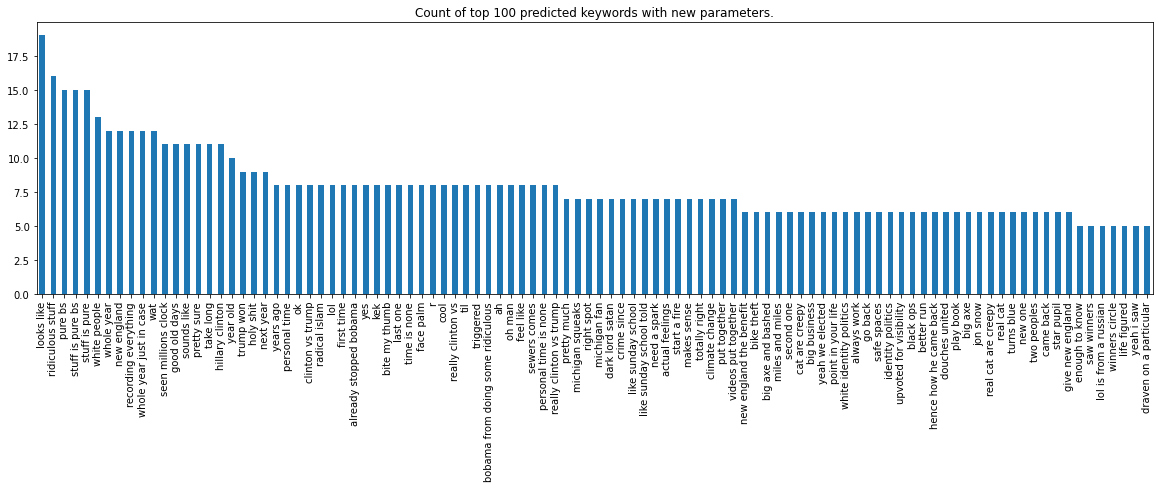

In [8]:
keyword_pipe['yake'].setMinNGrams(2)   
keyword_pipe['yake'].setMaxNGrams(5)  
keyword_pipe['yake'].setWindowSize(6)
keyword_predictions = keyword_pipe.predict(df['text'].iloc[0:5000])
keyword_predictions.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Count of top 100 predicted keywords with new parameters.', figsize=(20,5))
